# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini berasal dari **National Institute of Diabetes and Digestive and Kidney Diseases** dan tersedia secara publik di platform seperti Kaggle. Dataset ini dikenal dengan nama **Pima Indians Diabetes Database**, dan secara luas digunakan untuk penelitian dalam bidang prediksi penyakit diabetes.

📌 Tujuan Dataset

Tujuan utama dari dataset ini adalah untuk **memprediksi secara diagnostik apakah seorang pasien menderita diabetes** atau tidak, berdasarkan sejumlah fitur medis diagnostik.

🧪 Deskripsi Dataset

Dataset ini berisi data dari **wanita keturunan Pima Indian yang berusia 21 tahun ke atas**. Setiap baris mewakili satu pasien, dan fitur-fitur yang dikumpulkan meliputi berbagai ukuran medis. Berikut adalah beberapa variabel yang terdapat dalam dataset:

| Nama Fitur                 | Deskripsi                                                       |
| -------------------------- | --------------------------------------------------------------- |
| `Pregnancies`              | Jumlah kehamilan                                                |
| `Glucose`                  | Konsentrasi glukosa plasma                                      |
| `BloodPressure`            | Tekanan darah diastolik (mm Hg)                                 |
| `SkinThickness`            | Ketebalan lipatan kulit trisep (mm)                             |
| `Insulin`                  | Kadar insulin serum 2 jam (mu U/ml)                             |
| `BMI`                      | Indeks massa tubuh (berat badan dalam kg/(tinggi dalam m)^2)    |
| `DiabetesPedigreeFunction` | Fungsi silsilah diabetes (indikator risiko keturunan)           |
| `Age`                      | Usia dalam tahun                                                |
| `Outcome`                  | Target/label hasil diagnosis (1 = diabetes, 0 = tidak diabetes) |

🧭 Sumber Dataset

Dataset ini diunduh dari [Kaggle - Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset) dan telah digunakan sebagai basis dalam eksperimen model machine learning untuk klasifikasi risiko diabetes.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('diabetes_raw.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1




*   Terdapat 768 baris pada dataset tersebut
*   Terdapat 9 kolom yaitu: Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction,	Age, dan	Outcome



# **4. Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Insight:**

* Terdapat 2 kolom dengan tipe float64, yaitu BMI dan juga DiabetesPedigreeFunction
* Lalu 7 kolom lainnya memiliki tipe int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Cek Missing Value

In [5]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Insight:**

Tidak terdapat missing value

In [6]:
print(df.duplicated().sum())

0


**Insight:**

Tidak terdapat data yang duplicated

In [7]:
num_features = df.select_dtypes(include=[np.number]).columns

## Visualasasi Distribusi Penderita Diabetes

/tmp/ipython-input-8-1061247520.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


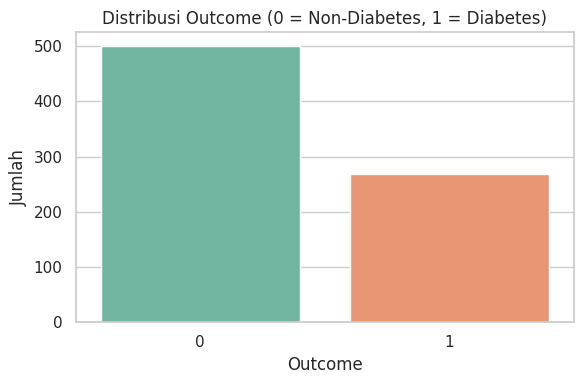

In [8]:
# Set style
sns.set(style="whitegrid")

# Plot distribusi Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribusi Outcome (0 = Non-Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

## Visualisasi distribusi fitur

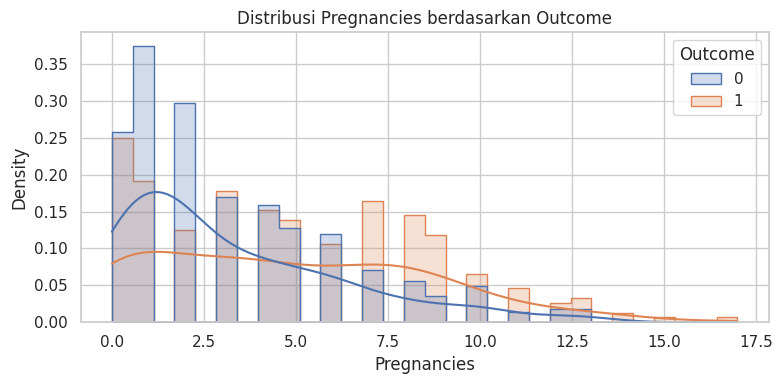

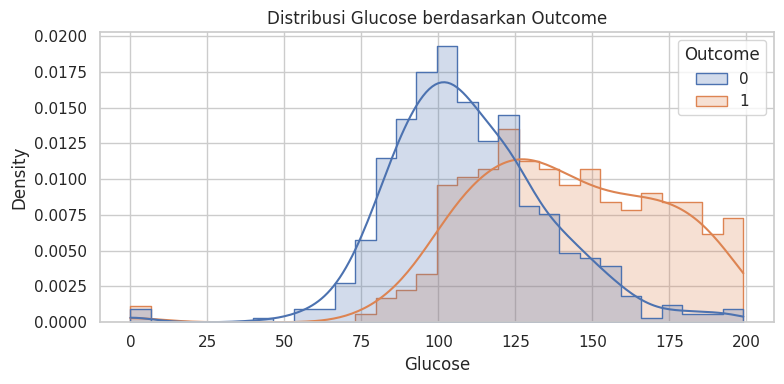

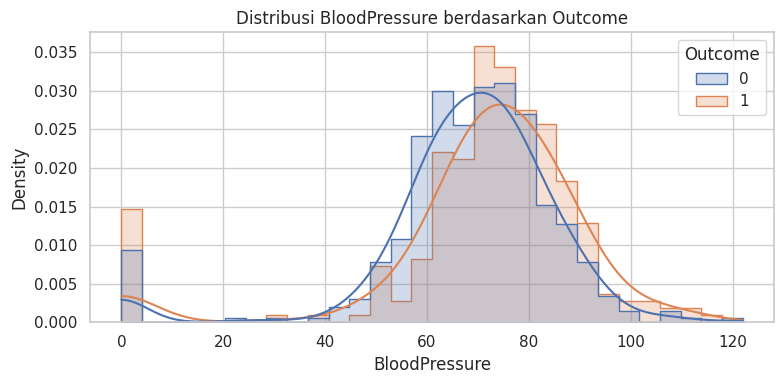

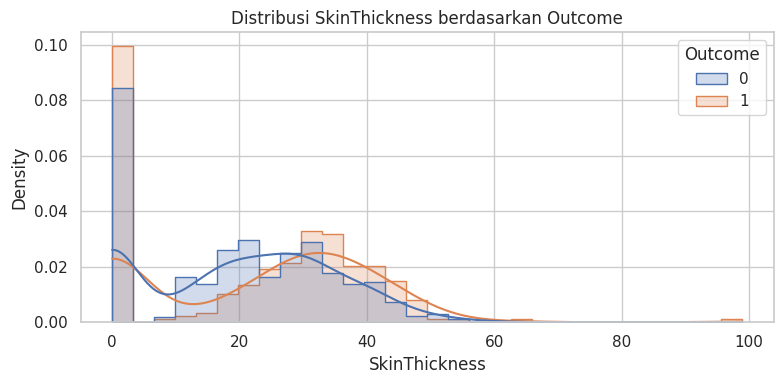

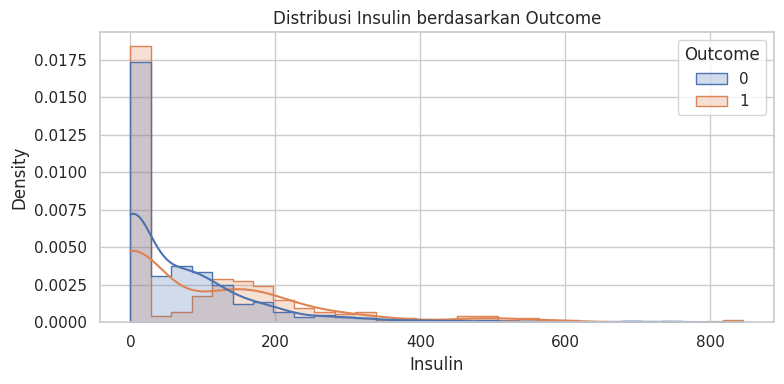

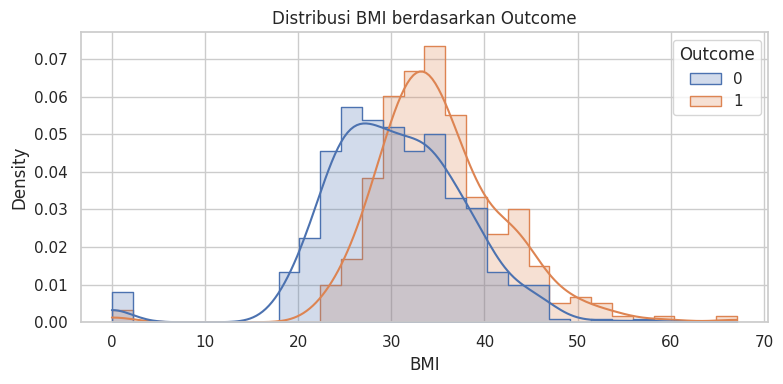

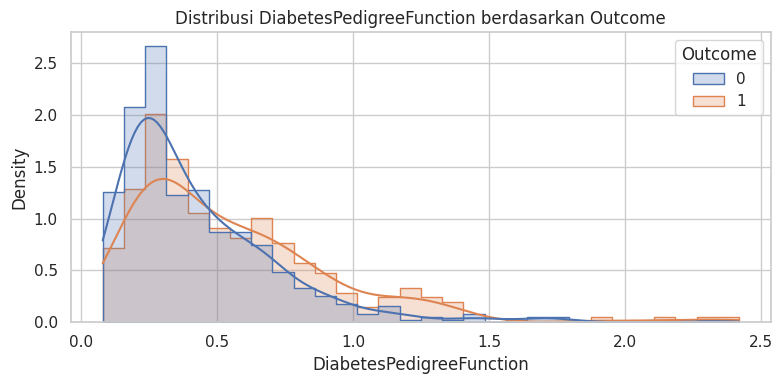

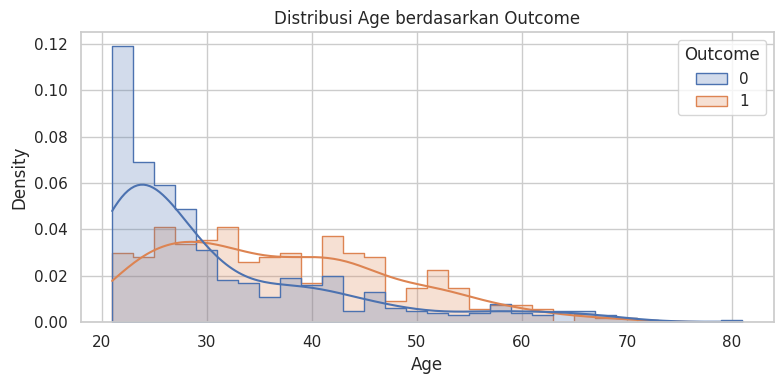

In [9]:
# Visualisasi distribusi fitur berdasarkan Outcome menggunakan histplot
for feature in df.columns[:-1]:  # semua kolom kecuali Outcome
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, bins=30,
                 element="step", stat="density", common_norm=False)
    plt.title(f'Distribusi {feature} berdasarkan Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

## Cek Data Outlier Menggunakan Box Plot

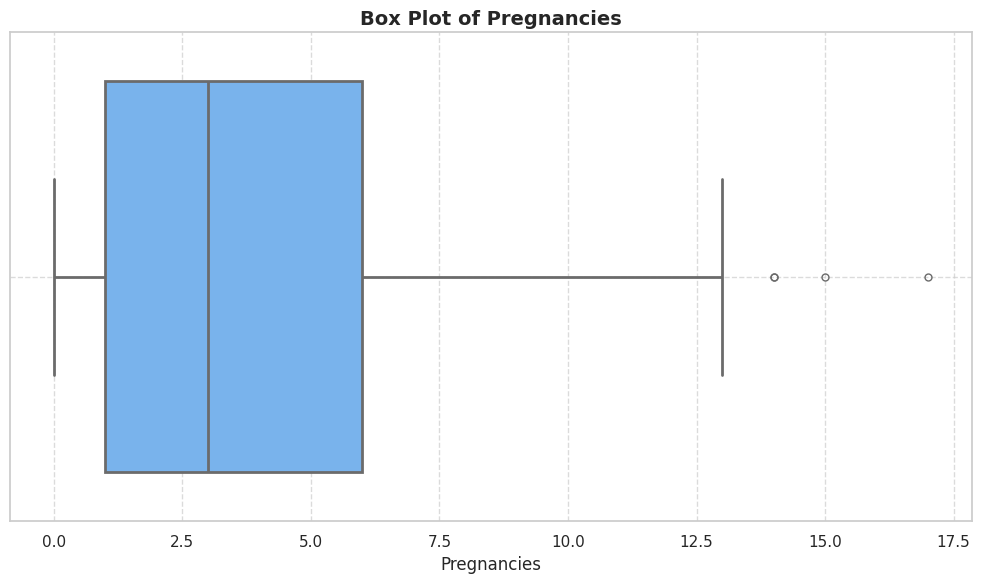

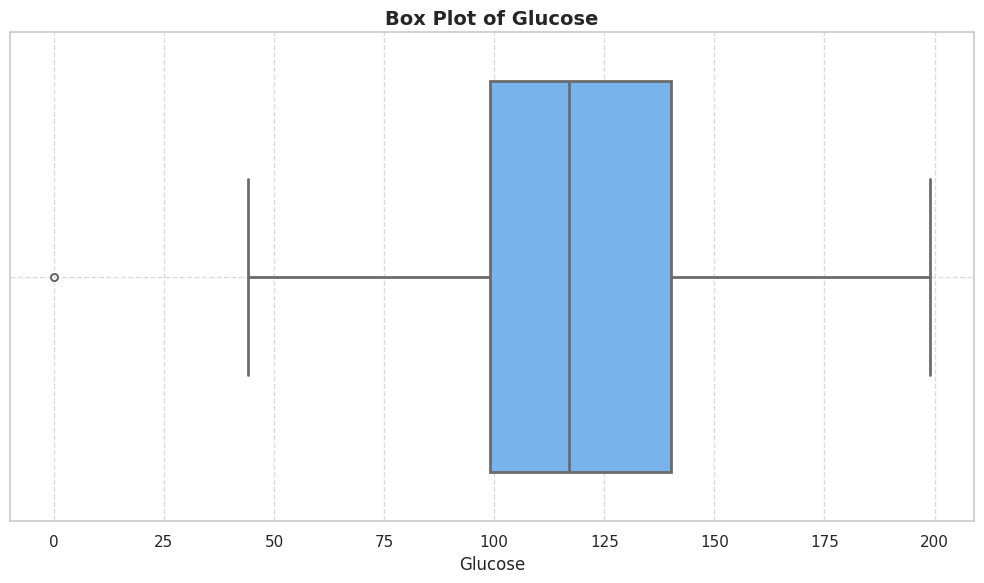

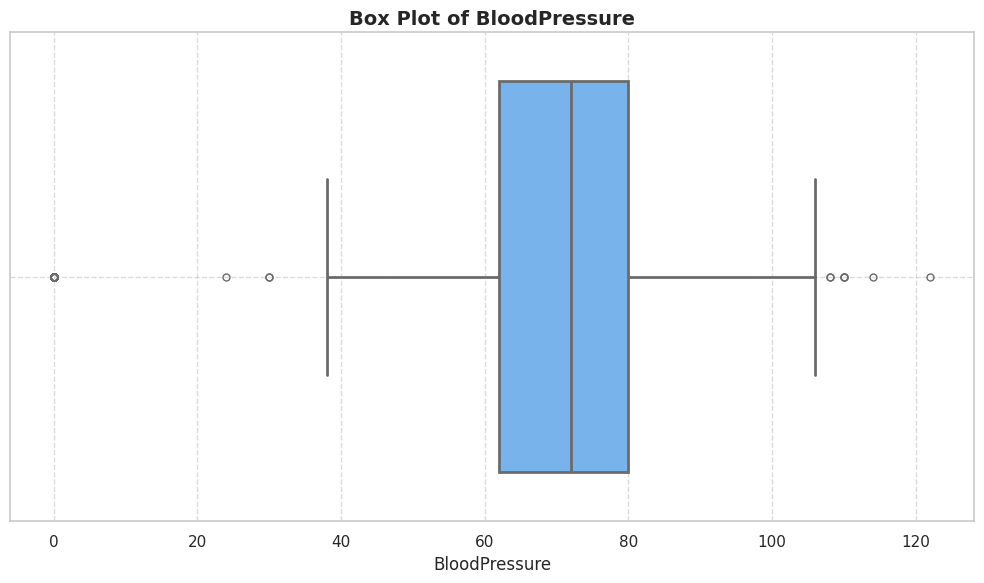

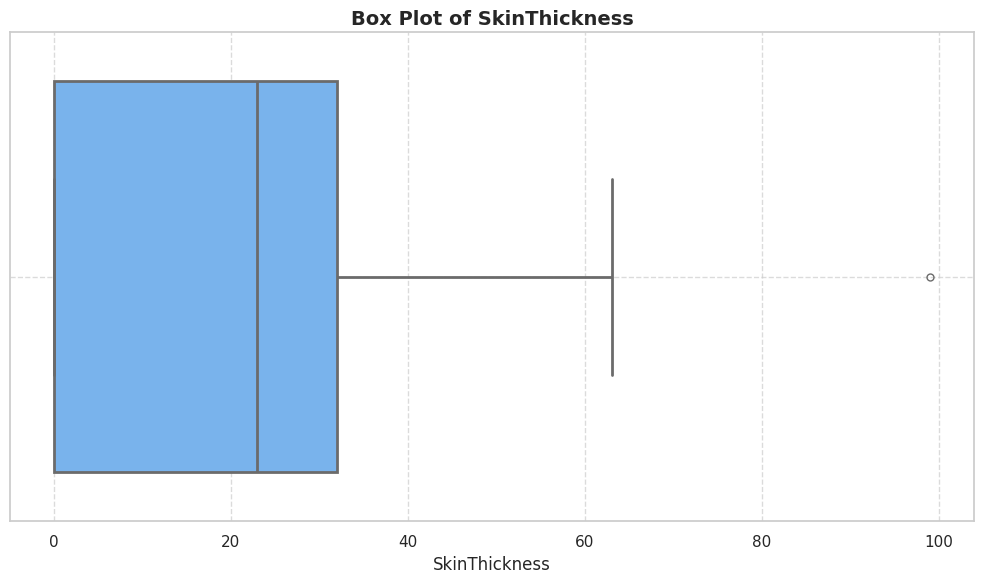

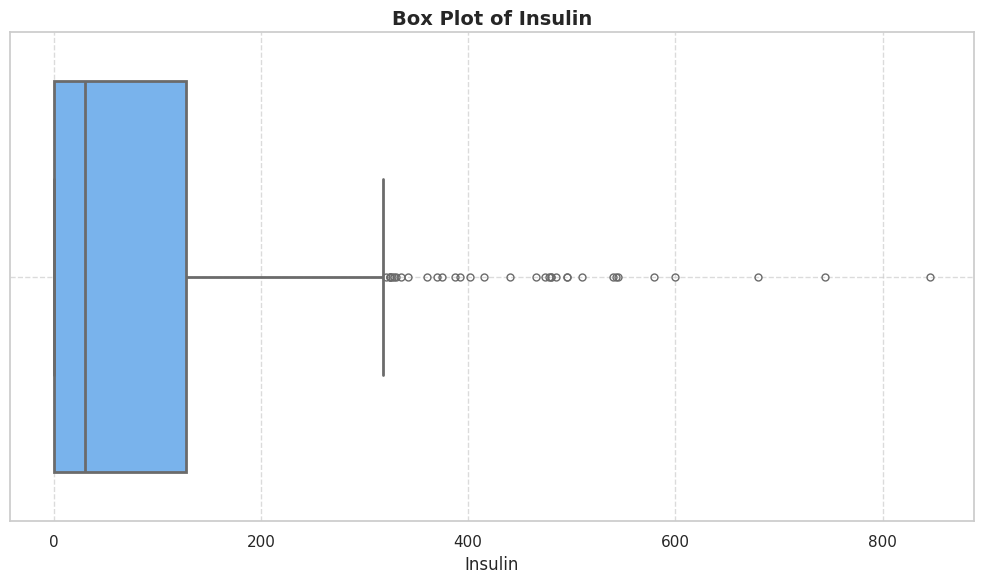

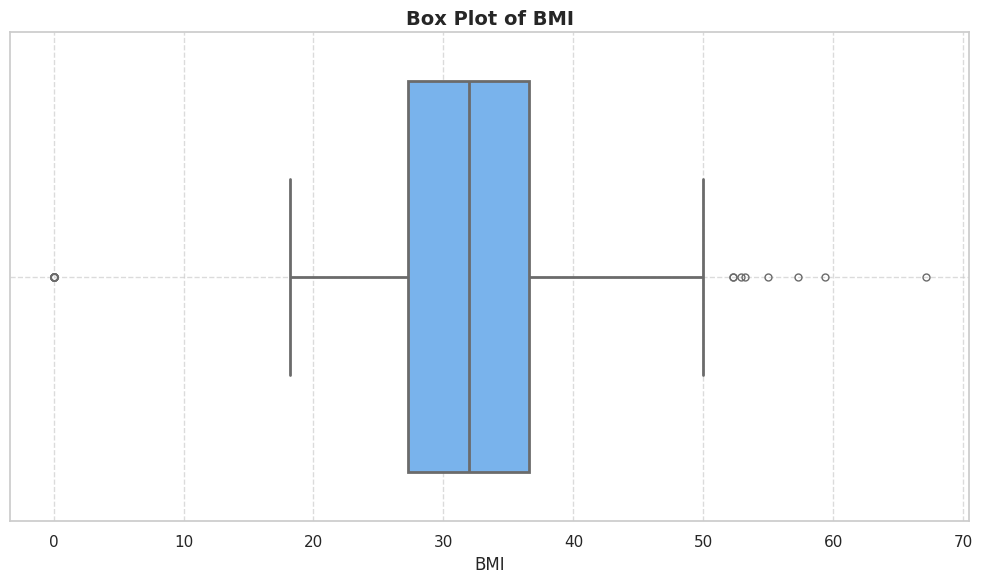

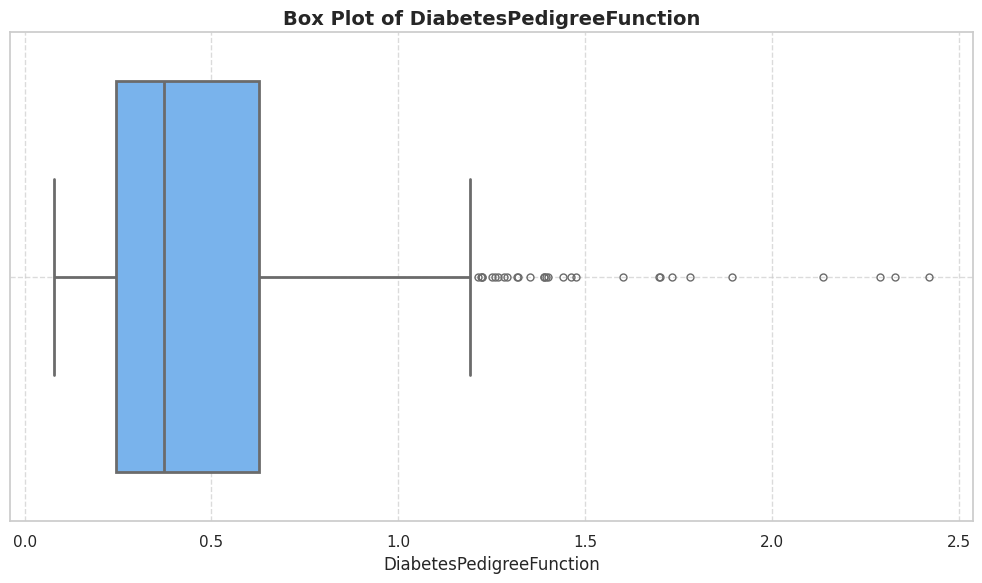

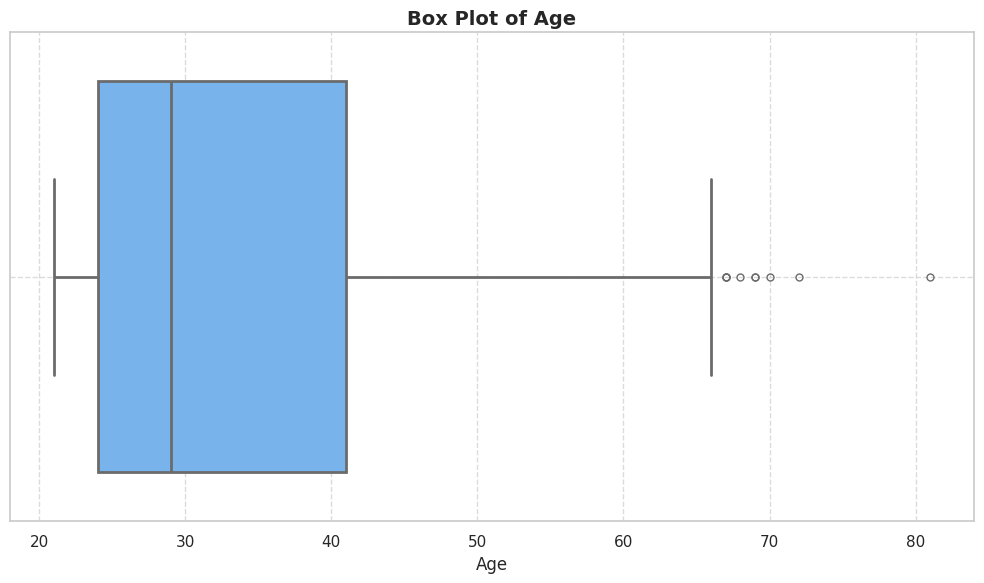

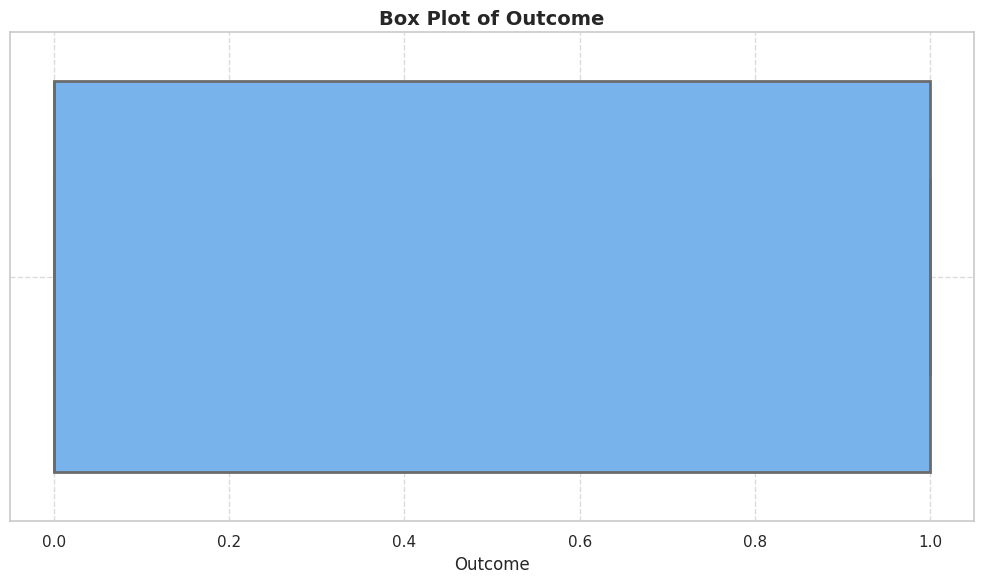

In [10]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], color="#66b3ff", linewidth=2, fliersize=5)
    plt.title(f'Box Plot of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Histogram Numerik Fitur

In [11]:
cat_features = df.select_dtypes(include=['object']).columns

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=df[feature], palette='pastel', edgecolor='gray')
    plt.title(f'Count Plot of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Jumlah", fontsize=12)

    # Tambahkan label di atas bar
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Tampilkan tabel frekuensi dan persentase
    percent = 100 * df[feature].value_counts(normalize=True)
    count = df[feature].value_counts()
    df_summary = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
    print(f"\nDistribusi untuk '{feature}':\n", df_summary)

    plt.tight_layout()
    plt.show()

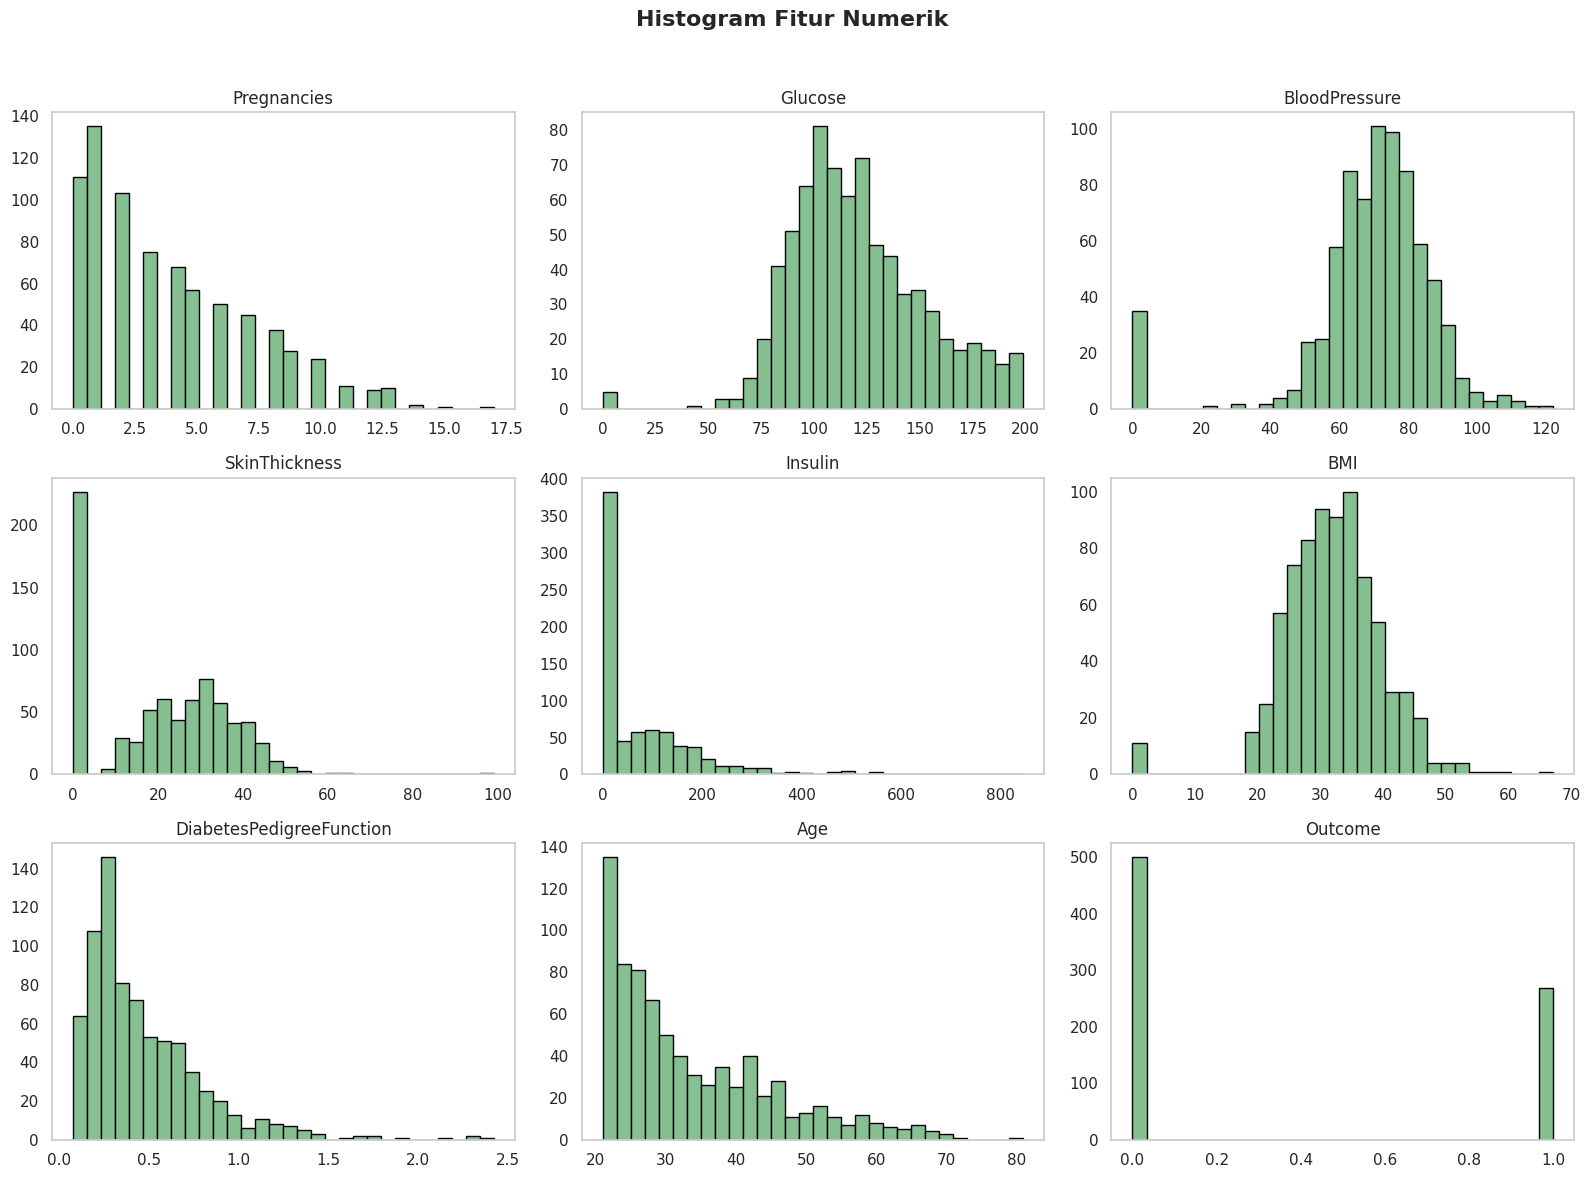

In [13]:
# Histogram grid untuk semua fitur numerik
df[num_features].hist(bins=30, figsize=(16, 12), color='#86bf91', edgecolor='black', grid=False)
plt.suptitle("Histogram Fitur Numerik", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # untuk memberi ruang ke judul
plt.show()

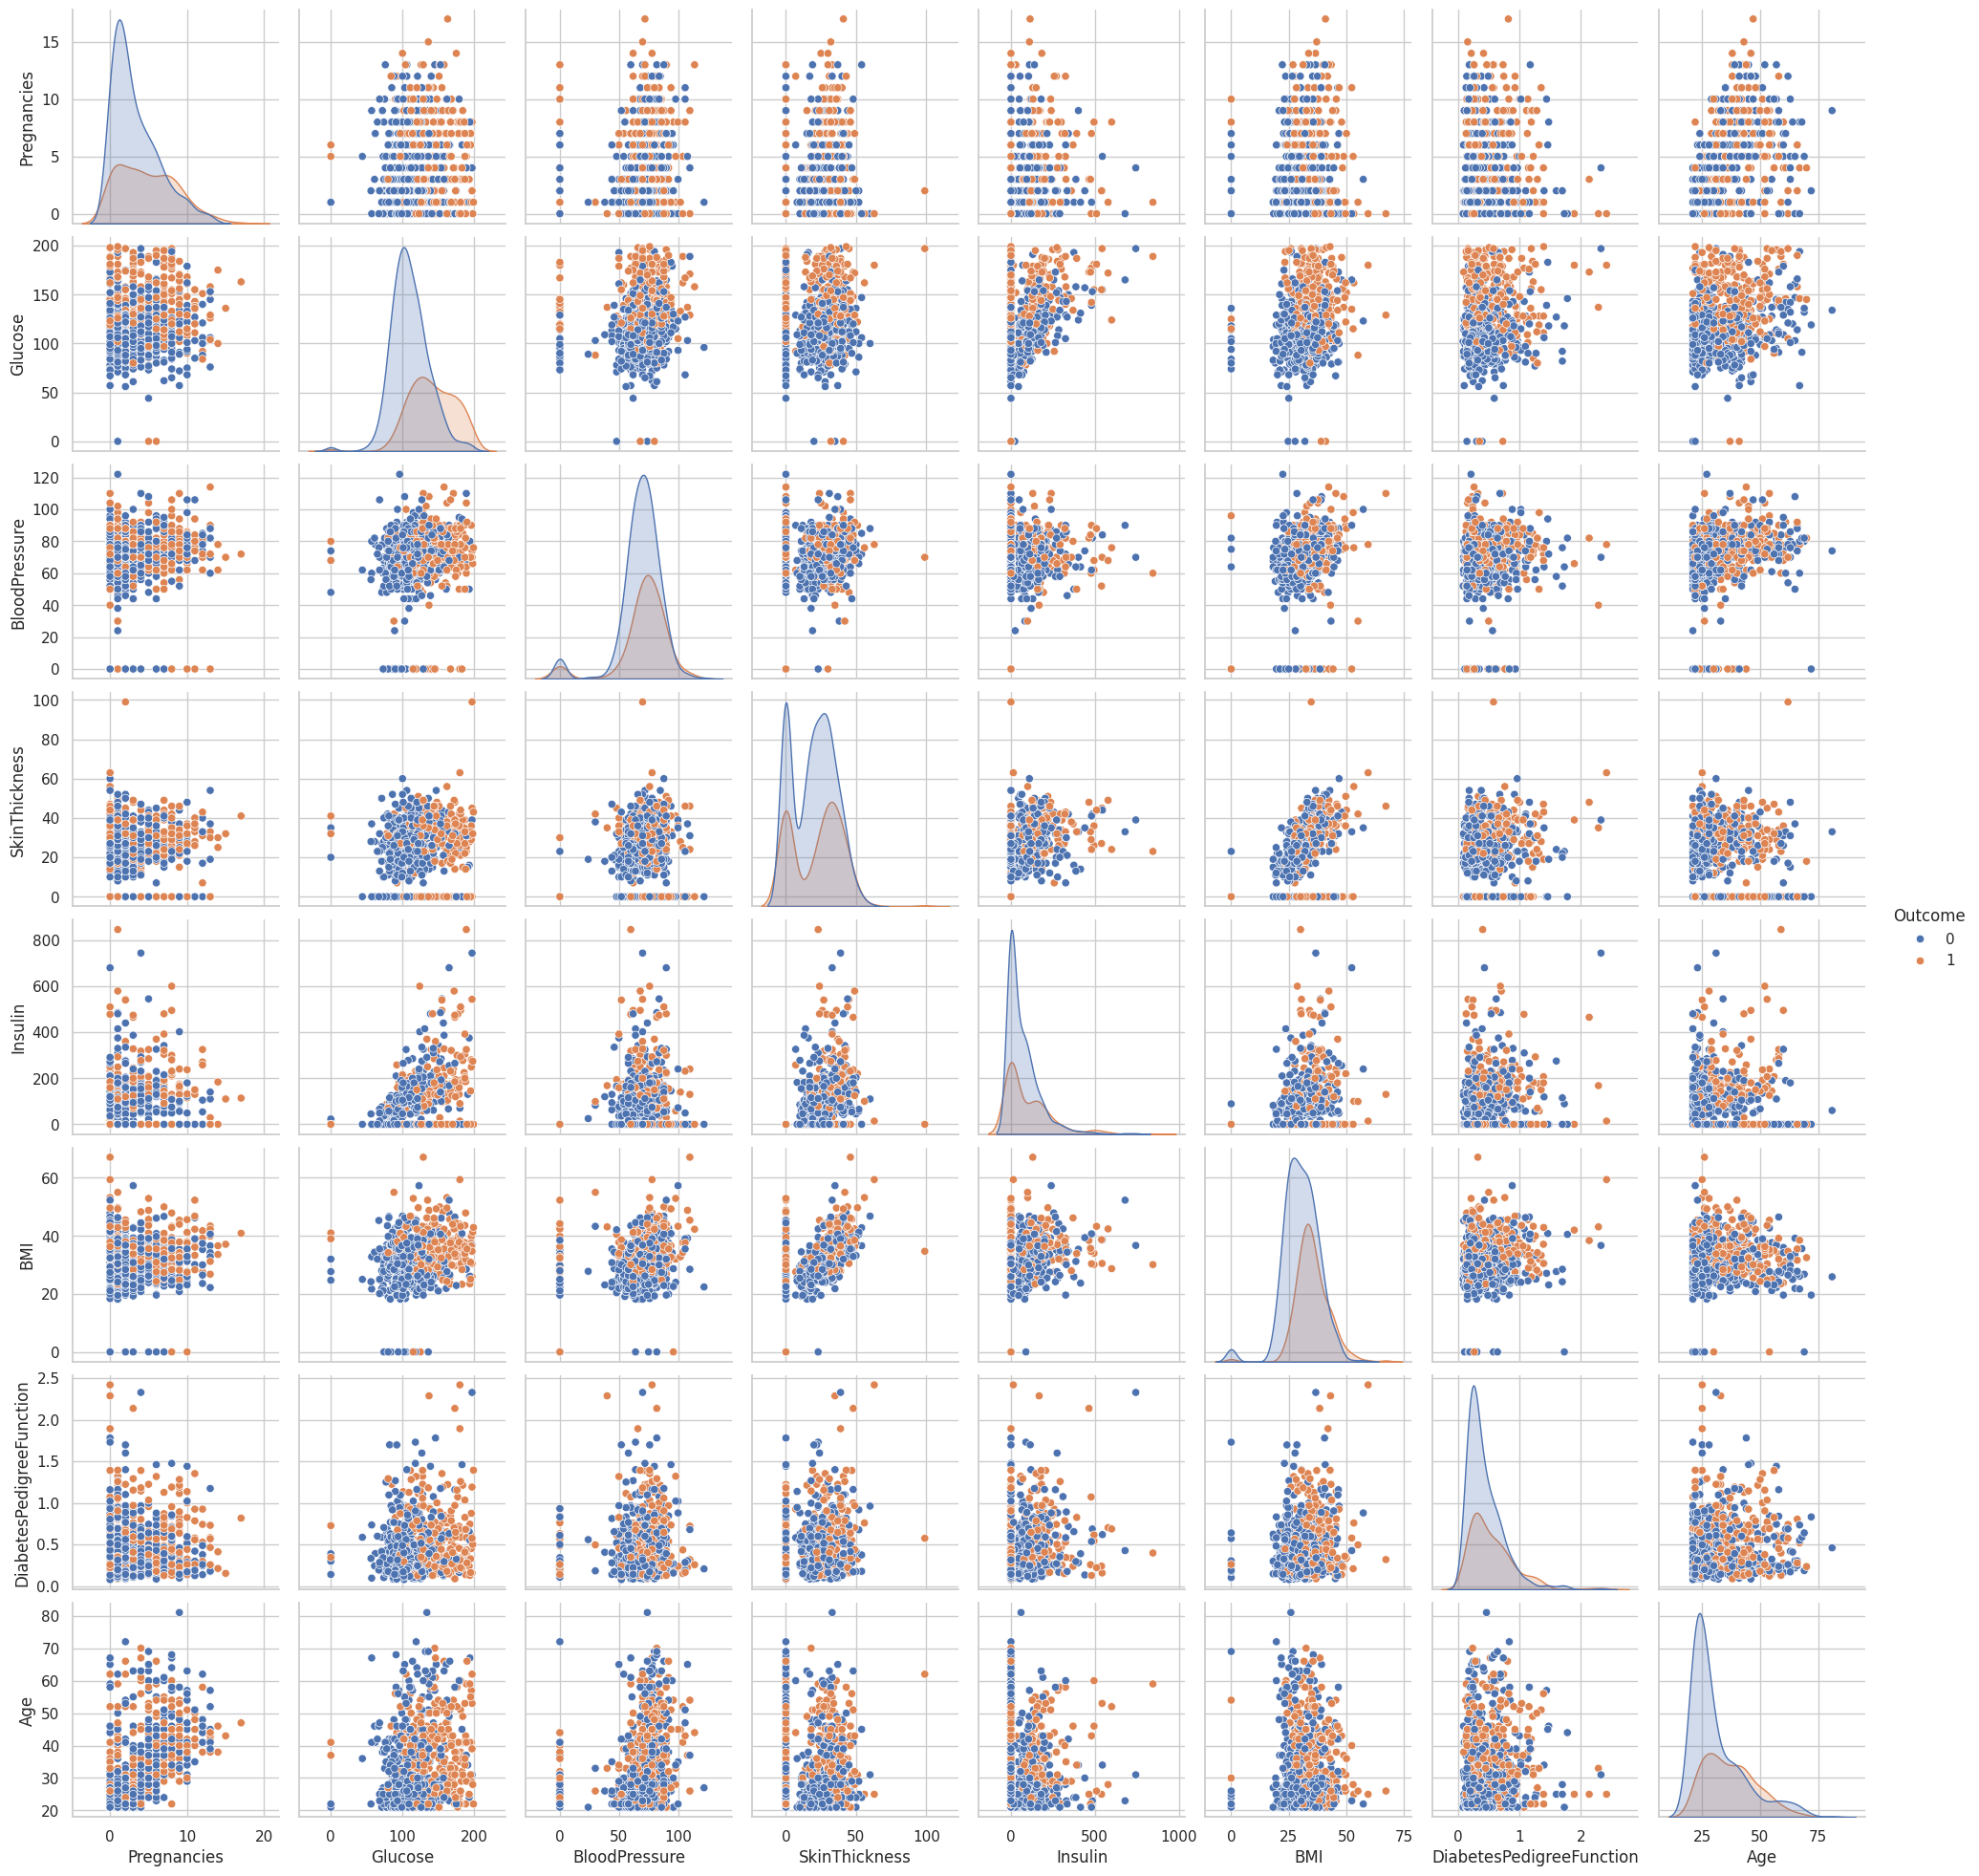

In [14]:
sns.pairplot(df, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()

## Matrix Korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

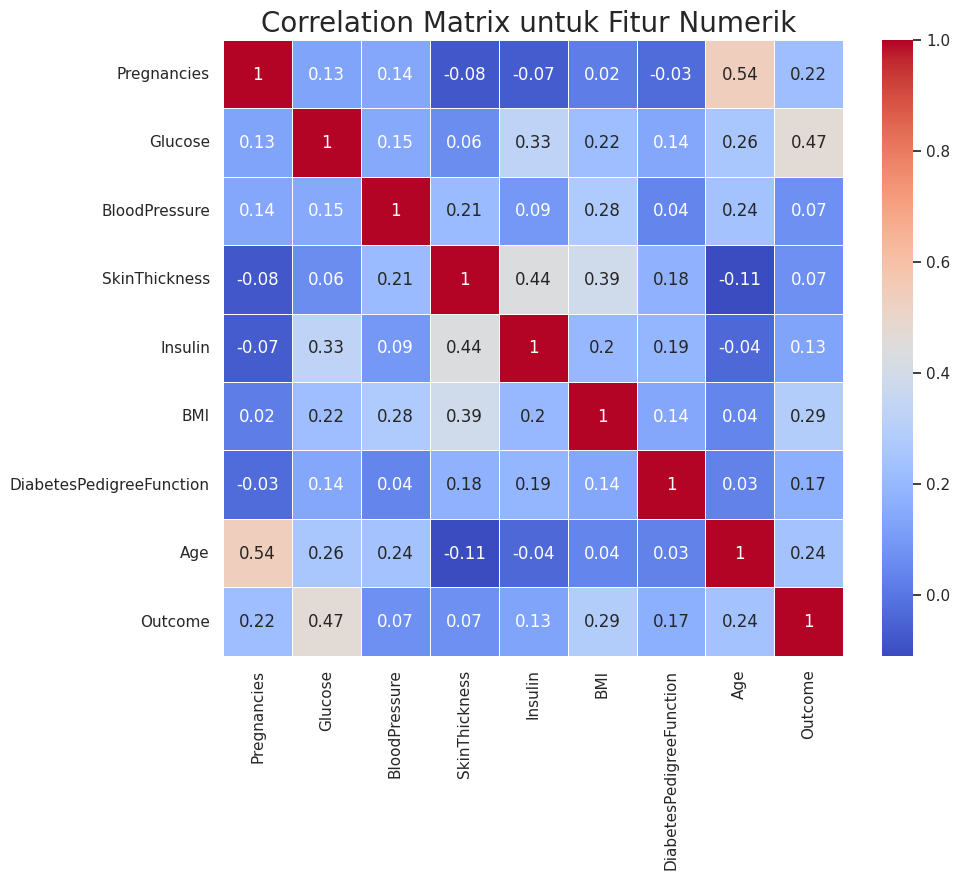

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# **5. Data Preprocessing**

In [16]:
df_clean = df.copy()

## Handling Outlier dengan IQR

In [17]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df_clean[num_features].quantile(0.25)
Q3 = df_clean[num_features].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df_clean[num_features] < (Q1 - 1.5 * IQR)) |
                    (df_clean[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)

df_clean = df_clean[filter_outliers]
df_clean.shape

(639, 9)

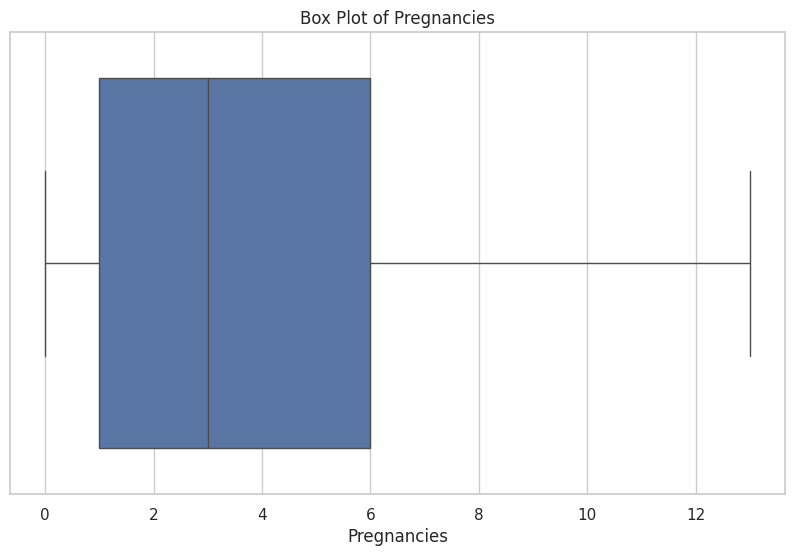

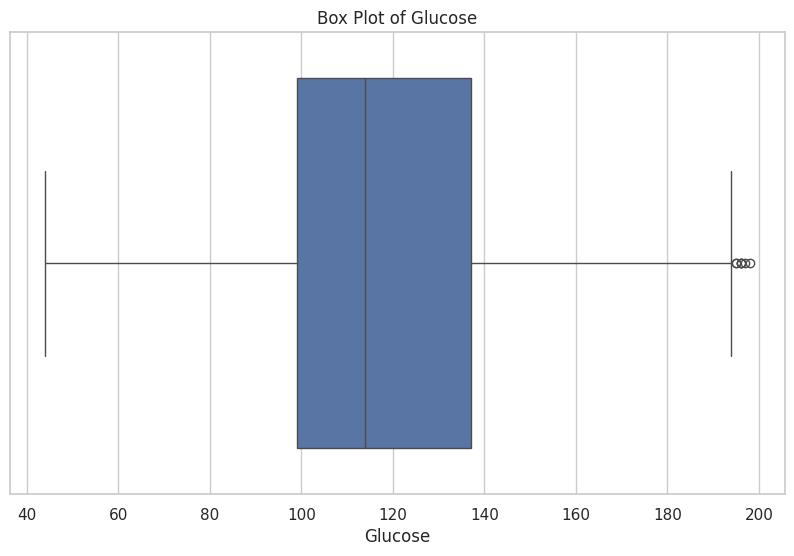

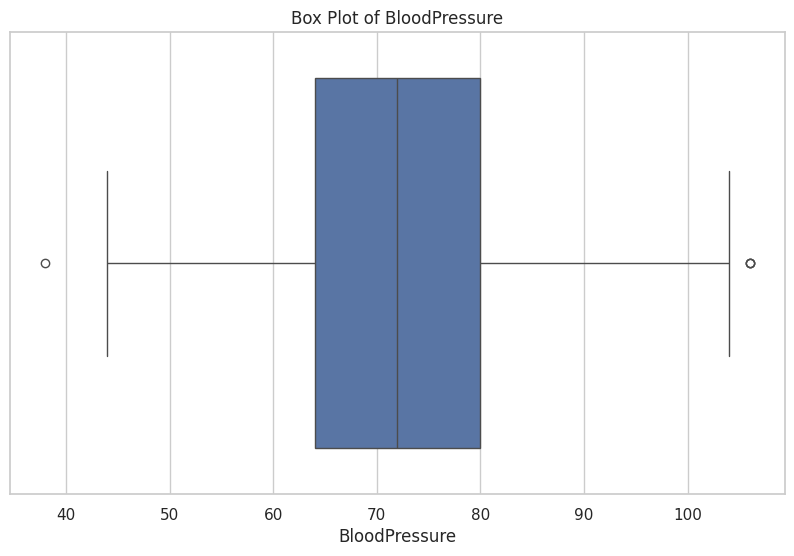

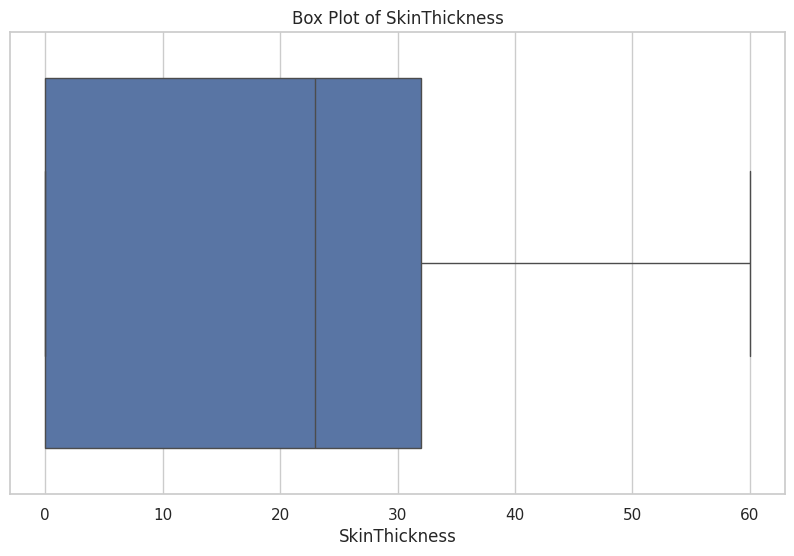

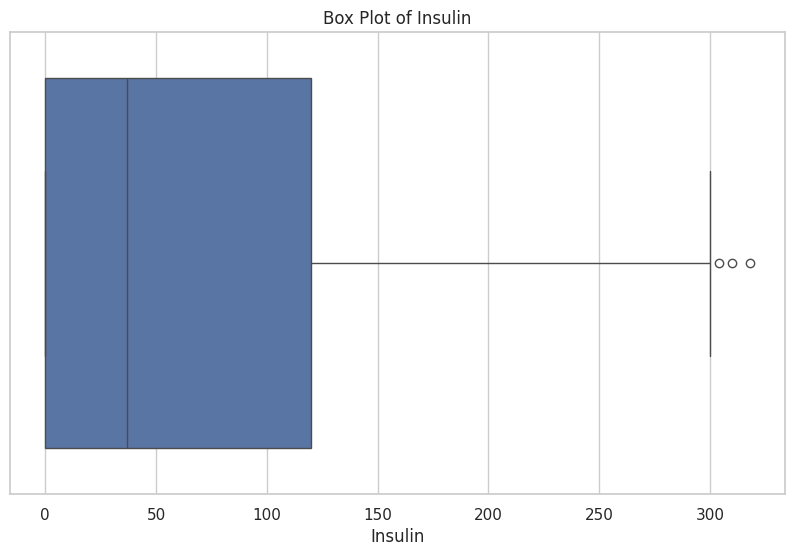

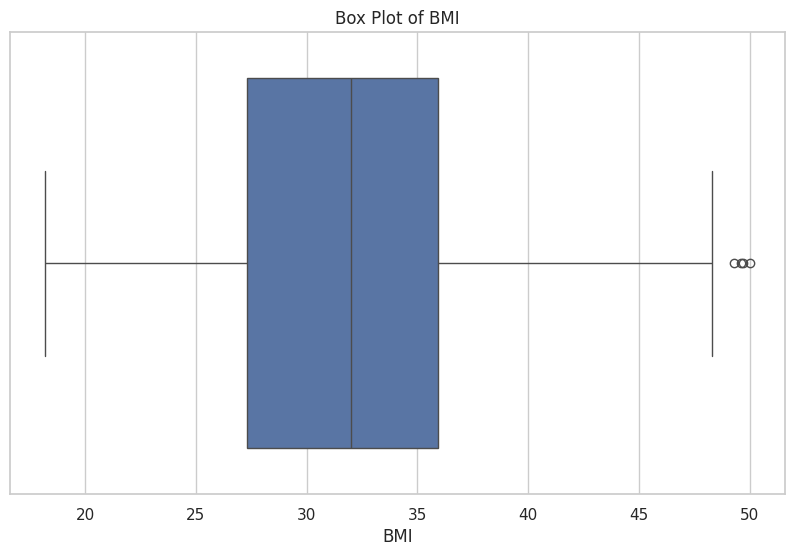

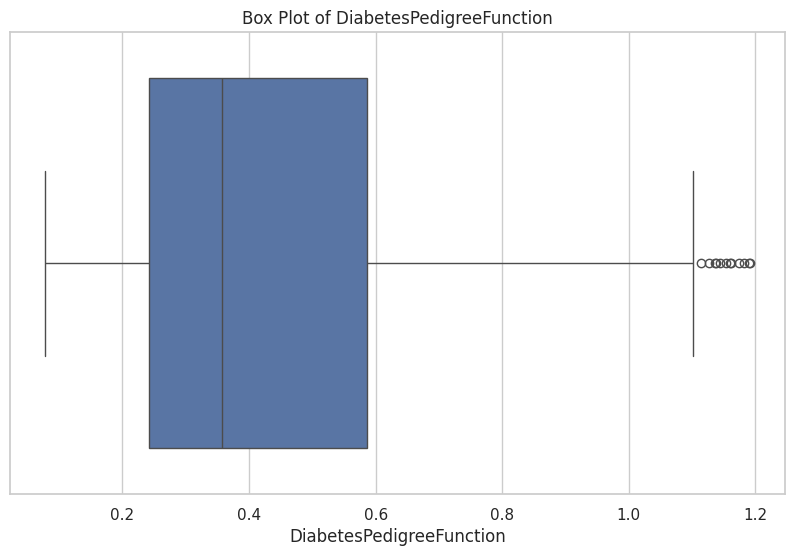

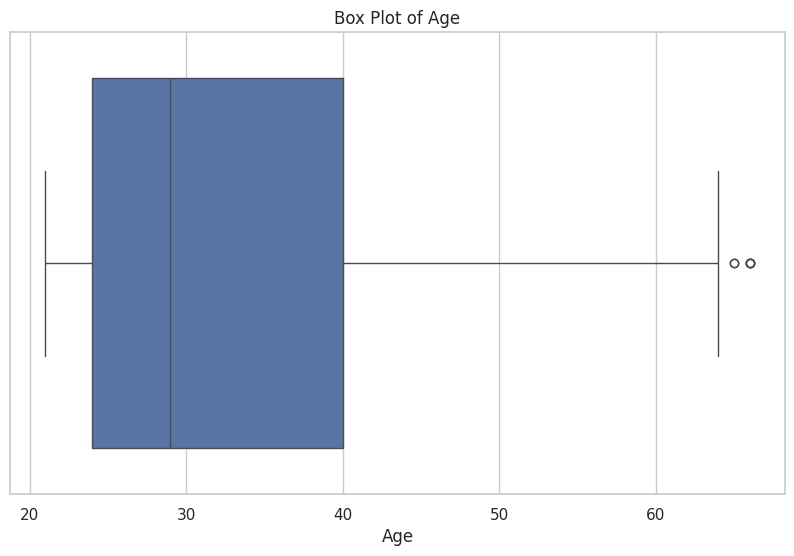

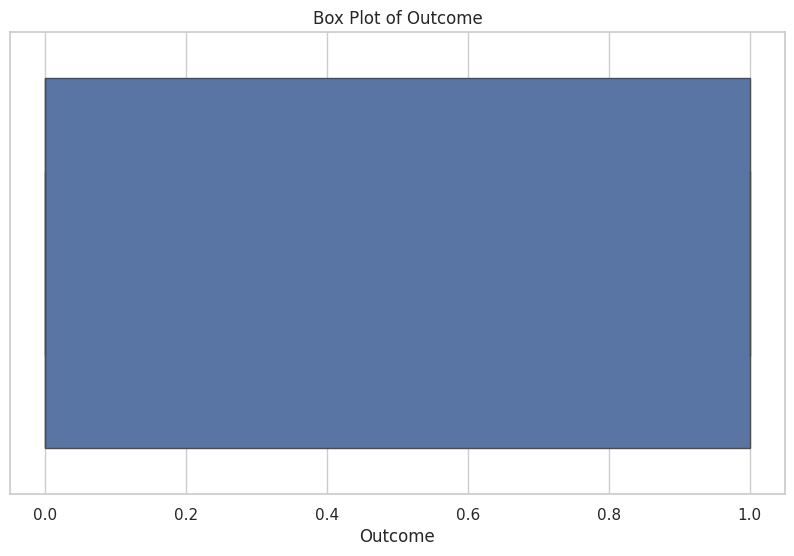

In [18]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_clean[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

## Standarisasi

In [19]:
# Standarisasi
num_features = df_clean.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_clean[num_features] = scaler.fit_transform(df_clean[num_features])
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132,1.481553
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912,-0.674967
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594,1.481553
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093,-0.674967
5,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230,-0.674967


In [20]:
# Simpan CSV ke folder tersebut
df_clean.to_csv('diabetes_data_preprocessing.csv', index=False)